## Scraping Reddit and posting to Pandas
inspiration for this notebook:
https://recycledrobot.co.uk/words/?web-scraping

quick tutorial: how to build a table with plotly.
https://plotly.com/python/table/

In [2]:
#!pip install lxml

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import lxml

In [3]:
# define a scraper function
def lovely_soup(url):
    r = requests.get(url, headers = {'User-agent': 'Agent_Smith'})
    return BeautifulSoup(r.text, 'html')

In [4]:
# apply the function to our reddit source
url = 'https://restaurantguru.com/Agas-Restaurant-Houston/reviews?bylang=1'
soup = lovely_soup(url)
# note: you can also try this one
# url = 'https://old.reddit.com/r/Showerthoughts?sort=top&t=week'

In [237]:
#print (soup)

In [5]:
# create a list of titles
reviews = soup.findAll('span', {'class': 'text_full'})
reviewlist=[]
for review in reviews:
    output = str(review).split('<span class="text_full">')[1]
    reviewlist.append(output)
   

In [6]:
# create a list of rating
ratings = soup.findAll('div', {'class':'o_review'})
ratinglist=[]
for rating in ratings:
    output = str(rating).split('data-score="')[1][0]
    ratinglist.append(output)


In [7]:
# create a list of days ago
daysagos = soup.findAll('span', {'class':'grey'})
daysagolist=[]
for daysago in daysagos:
    output = str(daysago).split('<span class="grey">')[1]
    daysagolist.append(output)

In [10]:
len(daysagolist)

101

In [11]:
daysagolist=daysagolist[1:]


In [12]:
# convert the two lists into a pandas dataframe
df_dict={'rating':ratinglist, 'days_ago':daysagolist,'review':reviewlist}
working_df = pd.DataFrame(df_dict)
pd.set_option('display.max_colwidth', 200)
working_df['review'] = working_df['review'].str.strip()

In [13]:
#print(working_df)

### Clean-up

In [14]:
print(working_df.replace(regex=['</span>'], value=' '))

   rating                days_ago  \
0       5  29 days ago on Google    
1       5  a month ago on Google    
2       5  a month ago on Google    
3       5  a month ago on Google    
4       5  a month ago on Google    
..    ...                     ...   
95      5   4 months ago on Yelp    
96      5   4 months ago on Yelp    
97      1   4 months ago on Yelp    
98      5   4 months ago on Yelp    
99      5          Opens at 11AM    

                                                                                                                                                                                                     review  
0   Dayaaammm  best goat chops ever! A must try. Chicken biryani had nice flavor but wasn't like students biryani in Karachi. Chicken karahi was good and a little like qorma. Their dessert which I hav...  
1                                                                                Very good food good service especially from sufiyan he was so 

In [16]:
# apply the function
working_df=working_df.replace(regex=['</span>'], value=' ')
working_df.head(3)

,rating,days_ago,review
0,5,29 days ago on Google,Dayaaammm best goat chops ever! A must try. Chicken biryani had nice flavor but wasn't like students biryani in Karachi. Chicken karahi was good and a little like qorma. Their dessert which I hav...
1,5,a month ago on Google,Very good food good service especially from sufiyan he was so helpful and nice and good service definitely will come back
2,5,a month ago on Google,My wife &amp; I are big plant based foodies. My wife went a few days ago with a cousin (I was not able to visit) and she loved it so much that she said I had to go back with her this weekend. It w...


### Final DF

In [17]:
final_df = working_df[['rating', 'days_ago', 'review']].copy()
final_df.head()

,rating,days_ago,review
0,5,29 days ago on Google,Dayaaammm best goat chops ever! A must try. Chicken biryani had nice flavor but wasn't like students biryani in Karachi. Chicken karahi was good and a little like qorma. Their dessert which I hav...
1,5,a month ago on Google,Very good food good service especially from sufiyan he was so helpful and nice and good service definitely will come back
2,5,a month ago on Google,My wife &amp; I are big plant based foodies. My wife went a few days ago with a cousin (I was not able to visit) and she loved it so much that she said I had to go back with her this weekend. It w...
3,5,a month ago on Google,Service is so professional and food is tasty.
4,5,a month ago on Google,"Outstanding, outstanding, outstanding service! Sufian Bhai and his team has left me speechless with the amount of love and care they have shown on my brothers reception! I have never received such..."


In [14]:
# write pandas df as html file 
# html = final_df.to_html(index=False) 
# text_file = open("docs/static/redditposts.html", "w") 
# text_file.write(html) 
# text_file.close() 

In [18]:
final_df.columns

Index(['rating', 'days_ago', 'review'], dtype='object')

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
def sentiment_scores(sentence):
    try:
    # Create a SentimentIntensityAnalyzer object.
        sid_obj = SentimentIntensityAnalyzer()
        sentiment_dict = sid_obj.polarity_scores(sentence)
        score = sentiment_dict['compound']
        if score >= 0.05 :
            final=f"Positive: {round(score,2)}"
        elif score <= - 0.05 :
            final=f"Negative: {round(score,2)}"
        else :
            final=f"Neutral: {round(score,2)}"
        return final
    except:
        return "Error"

In [23]:
working_df['sentiment'] = working_df['review'].apply(sentiment_scores)

In [24]:
 final_df = working_df[['rating', 'days_ago', 'review', 'sentiment']].copy()

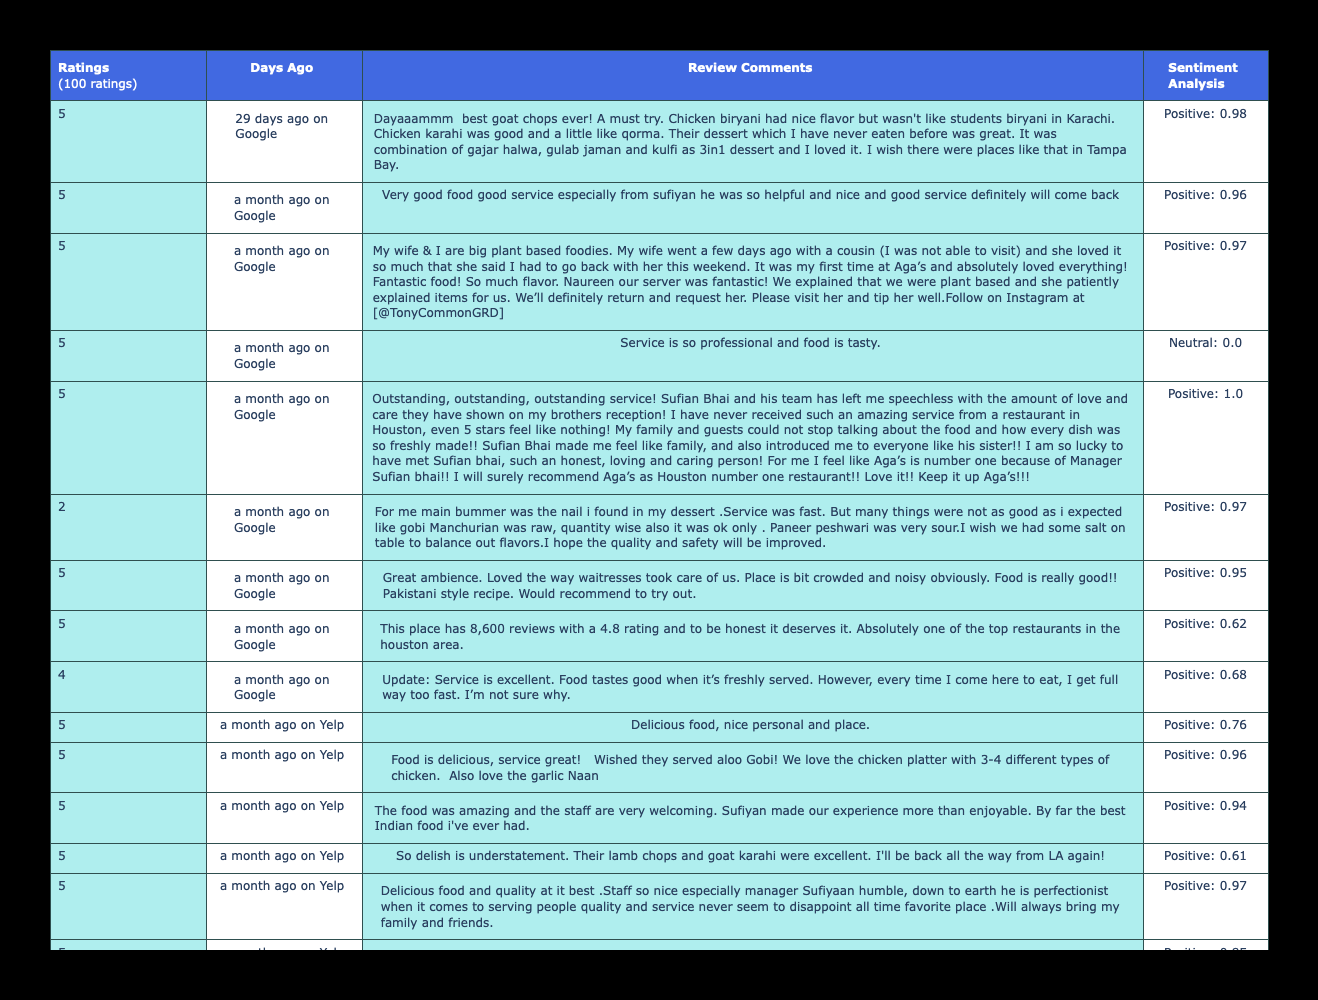

In [27]:
import plotly.graph_objs as go
data=go.Table(columnwidth = [200,200,1000,160],
                    header=dict(values=[['<b>Ratings</b><br>(100 ratings)'],
                                        ['<b>Days Ago</b>'],
                                        ['<b>Review Comments</b>'],
                                        ['<b>Sentiment<br>Analysis</b>']
                                        ], 
                           line_color='darkslategray',
                           fill_color='royalblue',
                           align=['left','center'],
                           font=dict(color='white', size=12),
                           height=40),
                    cells=dict(values=[final_df['rating'],
                                       final_df['days_ago'],
                                       final_df['review'],
                                       final_df['sentiment'].values
                                       ],
                              line_color='darkslategray',
                              fill=dict(color=['paleturquoise', 'white','paleturquoise','white']),
                              align=['left', 'center'],
                              font_size=12,
                              height=30)
              
                 )
fig = go.Figure([data])

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="black",
)
fig.show()



